<img src="images/notebook11_header.png" width="1024" alt="Python for Geospatial Data Science" style="border-radius:10px"/>

**Dr Gunnar Mallon** (g.mallon@rug.nl), *Department of Cultural Geography (Faculty of Spatial Science)*, *University of Groningen*

---

# Volcanic eruptions through the Holocene

Well done on completing the Python part of the course! Here is a walk through of the final exercise.

Most of it is pretty similar to the population exercise from the GeoPands part. First we need to import all of our libraries as we have done before.

In [75]:
import geopandas as gpd
import pandas as pd
import matplotlib.pyplot as plt

Now that the the main libraries are loaded in, we can set up the links to the data and shape files. Double-check that these are correct for you.

In [76]:
data_path = 'data/volcanoes/volcano_data/Smithsonian_VOTW_Holocene_Volcanoes.csv'
shape_path = 'data/volcanoes/shapefiles/World_Countries_Generalized.shp'
pop_path = 'data/volcanoes/population_data/world_population.csv'

Before we can start create the plot, we need to do some data pruning and data merging.

First of all, let's have a look at the CSV file.

In [77]:
pop = pd.read_csv(pop_path)
pop.head()

,Rank,CCA3,Country/Territory,Capital,Continent,2022 Population,2020 Population,2015 Population,2010 Population,2000 Population,1990 Population,1980 Population,1970 Population,Area (km²),Density (per km²),Growth Rate,World Population Percentage
0,36,AFG,Afghanistan,Kabul,Asia,41128771,38972230,33753499,28189672,19542982,10694796,12486631,10752971,652230,63.0587,1.0257,0.52
1,138,ALB,Albania,Tirana,Europe,2842321,2866849,2882481,2913399,3182021,3295066,2941651,2324731,28748,98.8702,0.9957,0.04
2,34,DZA,Algeria,Algiers,Africa,44903225,43451666,39543154,35856344,30774621,25518074,18739378,13795915,2381741,18.8531,1.0164,0.56
3,213,ASM,American Samoa,Pago Pago,Oceania,44273,46189,51368,54849,58230,47818,32886,27075,199,222.4774,0.9831,0.00
4,203,AND,Andorra,Andorra la Vella,Europe,79824,77700,71746,71519,66097,53569,35611,19860,468,170.5641,1.0100,0.00


In [78]:
df = pd.read_csv(data_path)
df.head()

,FID,Volcano_Number,Volcano_Name,Primary_Volcano_Type,Last_Eruption_Year,Country,Geological_Summary,Region,Subregion,Latitude,Longitude,Elevation,Tectonic_Setting,Geologic_Epoch,Evidence_Category,Primary_Photo_Link,Primary_Photo_Caption,Primary_Photo_Credit,Major_Rock_Type,GeoLocation
0,Smithsonian_VOTW_Holocene_Volcanoes.fid-100f88...,210010,West Eifel Volcanic Field,Volcanic field,-8300.0,Germany,The West Eifel Volcanic Field of western Germa...,Mediterranean and Western Asia,Western Europe,50.1700,6.8500,600,Rift zone / Continental crust (> 25 km),Holocene,Eruption Dated,https://volcano.si.edu/gallery/photos/GVP-0150...,The lake-filled Weinfelder maar is one of abou...,"Photo by Richard Waitt, 1990 (U.S. Geological ...",Foidite,POINT (50.17 6.85)
1,Smithsonian_VOTW_Holocene_Volcanoes.fid-100f88...,210020,Chaine des Puys,Lava dome(s),-4040.0,France,"The Chaîne des Puys, prominent in the history ...",Mediterranean and Western Asia,Western Europe,45.7860,2.9810,1464,Rift zone / Continental crust (> 25 km),Holocene,Eruption Dated,https://volcano.si.edu/gallery/photos/GVP-0880...,The central part of the Chaîne des Puys volcan...,Photo by Ichio Moriya (Kanazawa University).,Basalt / Picro-Basalt,POINT (45.786 2.981)
2,Smithsonian_VOTW_Holocene_Volcanoes.fid-100f88...,210030,Olot Volcanic Field,Volcanic field,NaN,Spain,The Olot volcanic field (also known as the Gar...,Mediterranean and Western Asia,Western Europe,42.1700,2.5300,893,Intraplate / Continental crust (> 25 km),Holocene,Evidence Credible,https://volcano.si.edu/gallery/photos/GVP-1199...,The forested Volcà Montolivet scoria cone rise...,Photo by Puigalder (Wikimedia Commons).,Trachybasalt / Tephrite Basanite,POINT (42.17 2.53)
3,Smithsonian_VOTW_Holocene_Volcanoes.fid-100f88...,210040,Calatrava Volcanic Field,Volcanic field,-3600.0,Spain,The Calatrava volcanic field lies in central S...,Mediterranean and Western Asia,Western Europe,38.8700,-4.0200,1117,Intraplate / Continental crust (> 25 km),Holocene,Eruption Dated,https://volcano.si.edu/gallery/photos/GVP-1185...,"Columba volcano, the youngest known vent of th...","Photo by Rafael Becerra Ramírez, 2006 (Univers...",Basalt / Picro-Basalt,POINT (38.87 -4.02)
4,Smithsonian_VOTW_Holocene_Volcanoes.fid-100f88...,211004,Colli Albani,Caldera,NaN,Italy,The Colli Albani (Alban Hills) complex immedia...,Mediterranean and Western Asia,Italy,41.7569,12.7251,949,Subduction zone / Continental crust (> 25 km),Holocene,Evidence Uncertain,https://volcano.si.edu/gallery/photos/GVP-0881...,The lake-filled Albano maar is part of the Alb...,Photo by Ichio Moriya (Kanazawa University).,Foidite,POINT (41.7569 12.7251)


You'll see that there are lots of entries for each country, which is what you'd expect as some countries had more than one volcanic eruption during the past 11,000 years.

Since we want to plot the data by country, we will need to aggregate the data. DataFrames has two methods that will help us with this `groupby` and `size`.

The `groupby` method takes a parameter of the column that the data should be grouped by. In this case we want to group the data by country. One group of rows will be for each individual country.

For each of these groups, we want to know how many rows there are - each representing a volcanic eruption. For this we can look at the `size` of the group.

For simplicity, we will store the new data in a new DataFrame called `eruptions`.

In [79]:
eruptions = df.groupby('Country').size()

eruptions.head()

Country
Algeria                3
Antarctica            19
Argentina             16
Armenia                3
Armenia-Azerbaijan     2
dtype: int64

Great! However, you'll see that the columns don't have headers and that the dataframe is not properly indexed. 

We use the `reset_index` function to fix this.

In [80]:
eruptions = eruptions.reset_index(name="Eruption Count")

eruptions.head()

,Country,Eruption Count
0,Algeria,3
1,Antarctica,19
2,Argentina,16
3,Armenia,3
4,Armenia-Azerbaijan,2


As you can see with row "4" the labelling for the individual countries is unique, seeing that some volcanos straddle several countries. 

I have cleaned up the new DataFrame for you and saved it into the file "/exercise_data/eruptions_count.csv". Go ahead and load the file so that you can match the two dataset more easily.

While, we're at it we can also drop the column that we don't need anymore.

In [81]:
# Read the csv file into the DataFrame and clean it up
data_path = "data/volcanoes/eruptions_count.csv"
df = pd.read_csv(data_path)
df.columns=['ID', 'Country', 'Eruptions Count']
df.drop(columns=['ID'], inplace=True)

df.head()

,Country,Eruptions Count
0,Algeria,3
1,Antarctica,19
2,Argentina,34
3,Armenia,3
4,Azerbaijan,2


Excellent. So now, we have a cleaned dataset of the number of volanoes that erupted in the Holocene per country.

Let's make sure that the **Eruptions Count** column is treated as integer.

In [82]:
df['Eruptions Count'] = df['Eruptions Count'].astype(int)
pop['World Population Percentage'] = pop['World Population Percentage'].astype(int)

Next we're load the shape file and merge the two dataframe. 

In [83]:
shape_data = gpd.read_file(shape_path)
shape_data.head()

,FID,COUNTRY,ISO,COUNTRYAFF,AFF_ISO,SHAPE_Leng,SHAPE_Area,geometry
0,1,Afghanistan,AF,Afghanistan,AF,50.803210,62.566714,"POLYGON ((61.27655 35.60725, 61.29638 35.62854..."
1,2,Albania,AL,Albania,AL,9.625038,3.073540,"POLYGON ((19.57083 41.68527, 19.58195 41.69569..."
2,3,Algeria,DZ,Algeria,DZ,70.540082,213.513461,"POLYGON ((4.60335 36.88791, 4.63555 36.88638, ..."
3,4,American Samoa,AS,United States,US,0.600124,0.013720,"POLYGON ((-170.74390 -14.37555, -170.74942 -14..."
4,5,Andorra,AD,Andorra,AD,0.937352,0.055585,"POLYGON ((1.44584 42.60194, 1.48653 42.65042, ..."


Ok, so in the shape file countries are listed under `COUNTRY` while they are in column `Country` in the data file. We can use those two columns as anchors to merge the dataframes.

In [74]:
shape_data = shape_data.merge(df, left_on='COUNTRY', right_on='Country', how='left')
shape_data = shape_data.merge(pop, left_on='COUNTRY', right_on='Country/Territory', how='left')
shape_data['Eruptions Count'].fillna(0, inplace=True)

import math

shape_data['corrected_eruptions'] = shape_data['Eruptions Count']/shape_data['2020 Population']
shape_data['corrected_eruptions'].fillna(0, inplace=True)

You will see that some of the `Eruption Count` entries have a `NaN` value, which stands for *Not A Number*. This happened because the shapefile had countries that were not in the datafile. These were the countries without volcanic eruptions.

If we were to plot the data as is, those countries would not get plotted and we'd have a map with holes in it. There is a handy function in Pandas called `fillna`, which allows you to set a value for NaN fields.

In [70]:
shape_data.head()

,FID,COUNTRY,ISO,COUNTRYAFF,AFF_ISO,SHAPE_Leng,SHAPE_Area,geometry,Country,Eruptions Count,...,2010 Population,2000 Population,1990 Population,1980 Population,1970 Population,Area (km²),Density (per km²),Growth Rate,World Population Percentage,corrected_eruptions
0,1,Afghanistan,AF,Afghanistan,AF,50.803210,62.566714,"POLYGON ((61.27655 35.60725, 61.29638 35.62854...",NaN,0.0,...,28189672.0,19542982.0,10694796.0,12486631.0,10752971.0,652230.0,63.0587,1.0257,0.0,0.000000
1,2,Albania,AL,Albania,AL,9.625038,3.073540,"POLYGON ((19.57083 41.68527, 19.58195 41.69569...",NaN,0.0,...,2913399.0,3182021.0,3295066.0,2941651.0,2324731.0,28748.0,98.8702,0.9957,0.0,0.000000
2,3,Algeria,DZ,Algeria,DZ,70.540082,213.513461,"POLYGON ((4.60335 36.88791, 4.63555 36.88638, ...",Algeria,3.0,...,35856344.0,30774621.0,25518074.0,18739378.0,13795915.0,2381741.0,18.8531,1.0164,0.0,0.006904
3,4,American Samoa,AS,United States,US,0.600124,0.013720,"POLYGON ((-170.74390 -14.37555, -170.74942 -14...",NaN,0.0,...,54849.0,58230.0,47818.0,32886.0,27075.0,199.0,222.4774,0.9831,0.0,0.000000
4,5,Andorra,AD,Andorra,AD,0.937352,0.055585,"POLYGON ((1.44584 42.60194, 1.48653 42.65042, ...",NaN,0.0,...,71519.0,66097.0,53569.0,35611.0,19860.0,468.0,170.5641,1.0100,0.0,0.000000


One last thing that we can do before plotting the map, is to see if there are any territories that we should exclude. In this case, I'll exclude Antarctica, as it tends to skew the map, but this step is entirely up to you.

In [66]:
exclude_territories = ['Iceland'] 
shape_data = shape_data[~shape_data['COUNTRY'].isin(exclude_territories)]

We are ready to plot our map! Hurray.

You have done this before in the GeoPandas example that you did in class. We'll use the same options, except that we are plotting for column *Eruptions Count*.

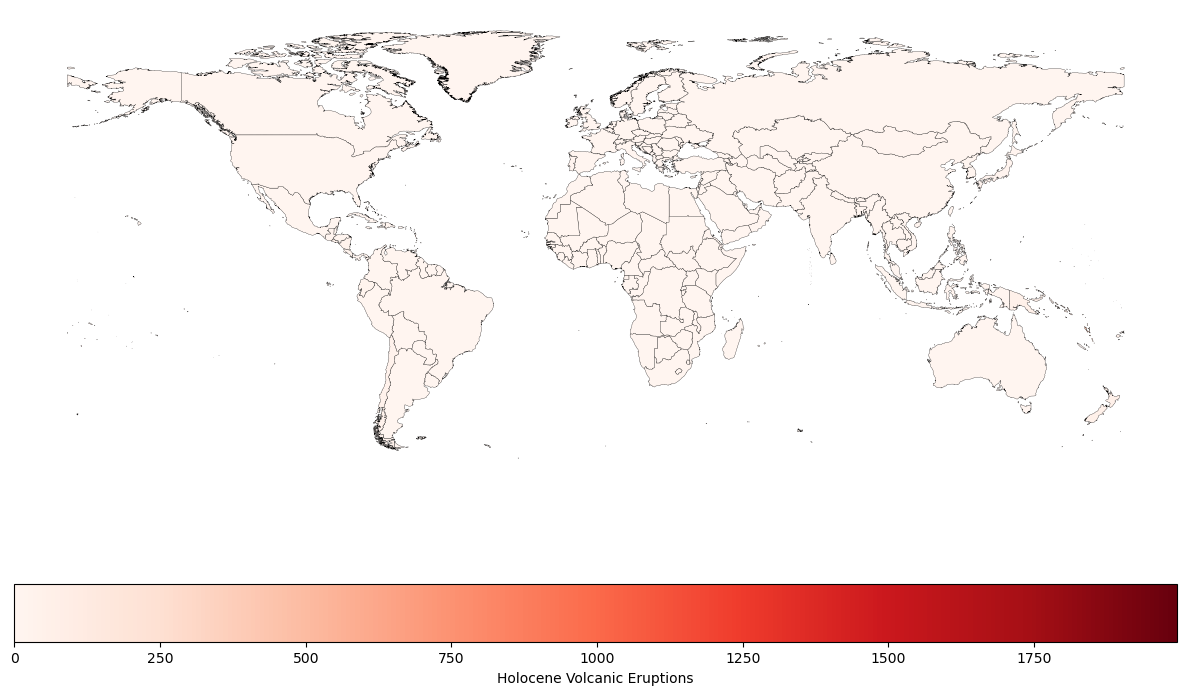

In [72]:
# Create the plot and store it in 'ax'
ax = shape_data.plot(
    column='corrected_eruptions',
    legend=True,
    legend_kwds={
        'label': "Holocene Volcanic Eruptions",
        'orientation': "horizontal",
        'format': "%0.0f"
    },
    figsize=(15, 9),
    cmap='Reds',
    edgecolor='black',
    linewidth=0.2
)

# Use Matplotlib to show the plot
ax.set_axis_off()
plt.show()

I hope that you've enjoyed the Python element of the module and that this is but the beginning of your programming journey!

What's next?

Remember to check out [Codewars](https://codewars.com) for lots of cool programming challenges.

If that's not your cup of tea, you can also expand on this little project. You could

- control the eruption count for area of the country
- add the individual eruptions to the map too
- or control for population
- ... there are so many possibilities.

🎉🎊